In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
EXTRA_SMALL_SIZE = 14
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

In [3]:
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=EXTRA_SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=EXTRA_SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
PROVINCES = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Northwest Territories', 'Yukon', 'Nunavut']

In [5]:
# https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html#a1
df = pd.read_csv('datasets/can_covid19.csv', usecols=['prname', 'date', 'numtotal', 'numtested', 'ratetested'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['total_tests_per_thousand'] = df['ratetested'] / 1000
df['positive_rate'] = df['numtotal'] / df['numtested']
df = df[df['prname'].isin(PROVINCES)]
df

,prname,date,numtotal,numtested,ratetested,total_tests_per_thousand,positive_rate
0,Ontario,2020-01-31,3,NaN,NaN,NaN,NaN
1,British Columbia,2020-01-31,1,NaN,NaN,NaN,NaN
3,Ontario,2020-02-08,3,NaN,NaN,NaN,NaN
4,British Columbia,2020-02-08,4,NaN,NaN,NaN,NaN
6,Ontario,2020-02-16,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7295,Nova Scotia,2021-07-06,5861,NaN,NaN,NaN,NaN
7296,Prince Edward Island,2021-07-06,207,NaN,NaN,NaN,NaN
7297,Yukon,2021-07-06,425,NaN,NaN,NaN,NaN
7298,Northwest Territories,2021-07-06,128,NaN,NaN,NaN,NaN


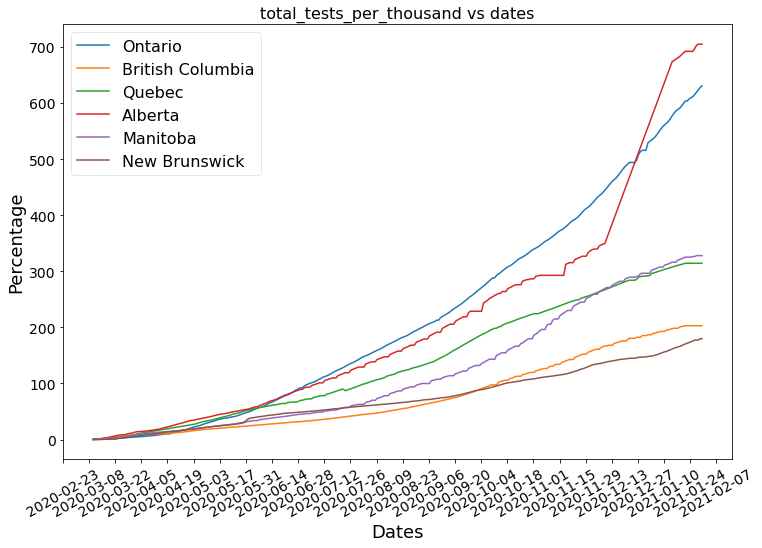

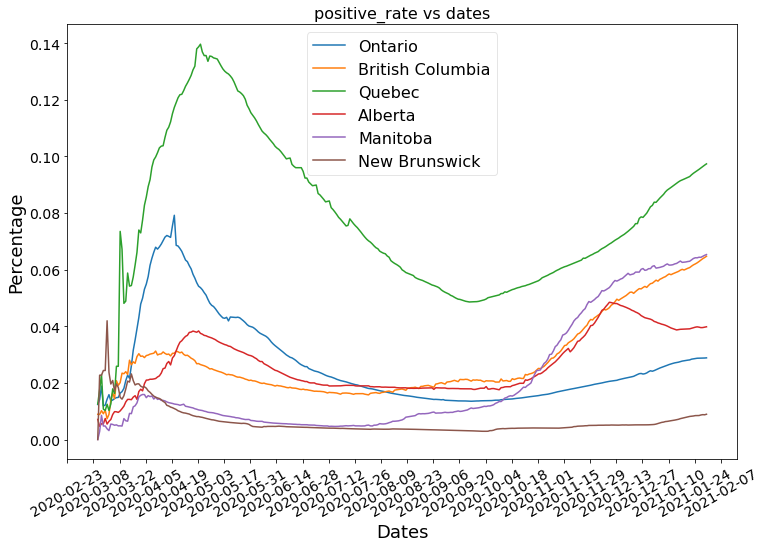

In [6]:
def plot_rates(df, target_provinces, label, title):
    fig = plt.figure(facecolor='w', figsize=(12, 8))
    ax = fig.add_subplot(111)
    for c in target_provinces:
        rate = df[df['prname'] == c][label].to_list()
        date = df[df['prname'] == c]['date']
        ax.plot(date, rate, label=c)
    ax.set_xlabel('Dates')
    ax.set_ylabel('Percentage')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 14))
    ax.xaxis.set_tick_params(rotation=30)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.title(title)

target_provinces = ['Ontario', 'British Columbia', 'Quebec', 'Alberta', 'Manitoba', 'New Brunswick']
plot_rates(df, target_provinces, "total_tests_per_thousand", "total_tests_per_thousand vs dates")
plot_rates(df, target_provinces, "positive_rate", "positive_rate vs dates")

In [7]:
df.to_csv('datasets/can_covid19_processed.csv', index=False, columns=["prname", "date",  "positive_rate"], header=False)